<a href="https://colab.research.google.com/github/JamesEdMichaud/cs480student/blob/main/07/Michaud_CS480_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

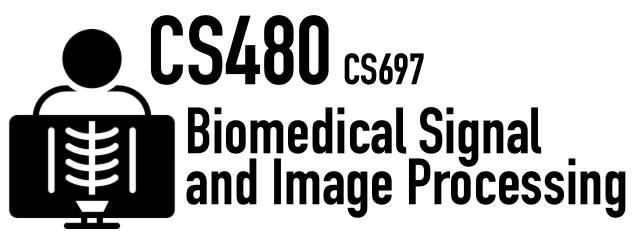
#Assignment 7

In [ ]:
# In this assignment, we will explore the Imaging Data Commons,
# a new service from the National Cancer Institute.
#
# We will find and explore a PET dataset and then perform a MIP reconstruction.

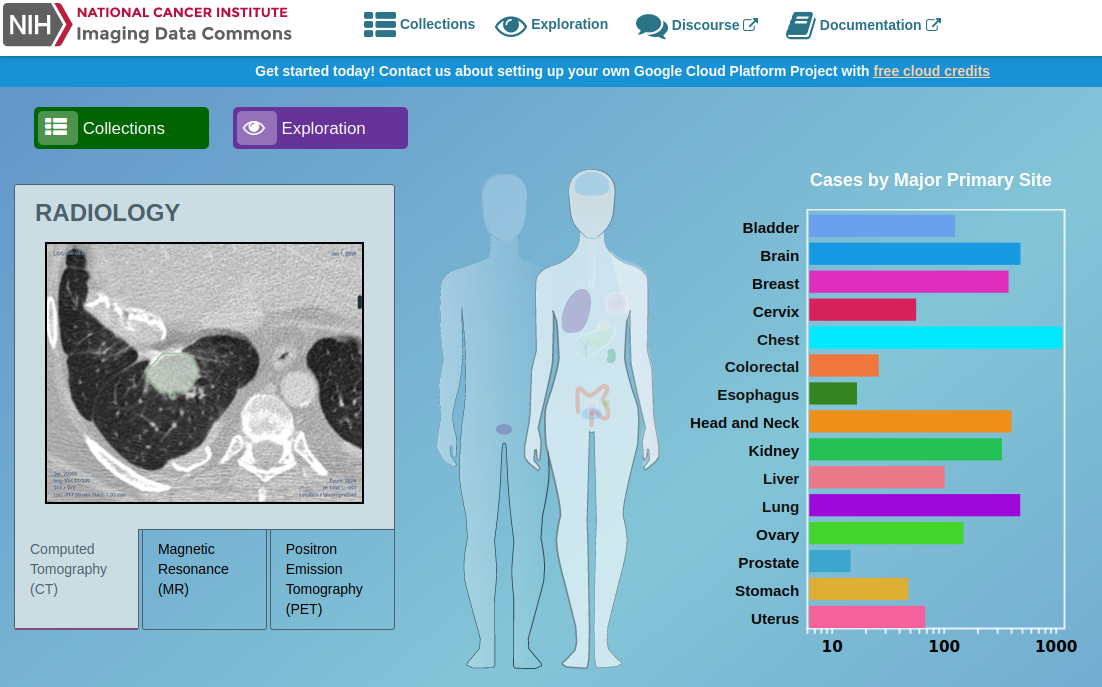

**Task 1**: Browse the IDC datasets and find a combined CT or MRI with PET! [15 Points]

In [ ]:
#
# Visit https://portal.imaging.datacommons.cancer.gov/ and find a dataset
# that includes structural imaging such as CT or MRI combined with a PET scan.
#
# You can start by selecting the type of a cancer case such as Bladder, Brain etc.
# Hint: Head and Neck include many PET scans.
#

In [ ]:
# TODO: Open the integrated OHIF viewer to view the data.
#
# 1) Select a collection, then a case, then a study in the IDC interface.
# 2) To open the OHIF viewer, click on the view icon.
# 3) Paste a screenshot of the viewer after the data was loaded below.
#

TODO: Add a screenshot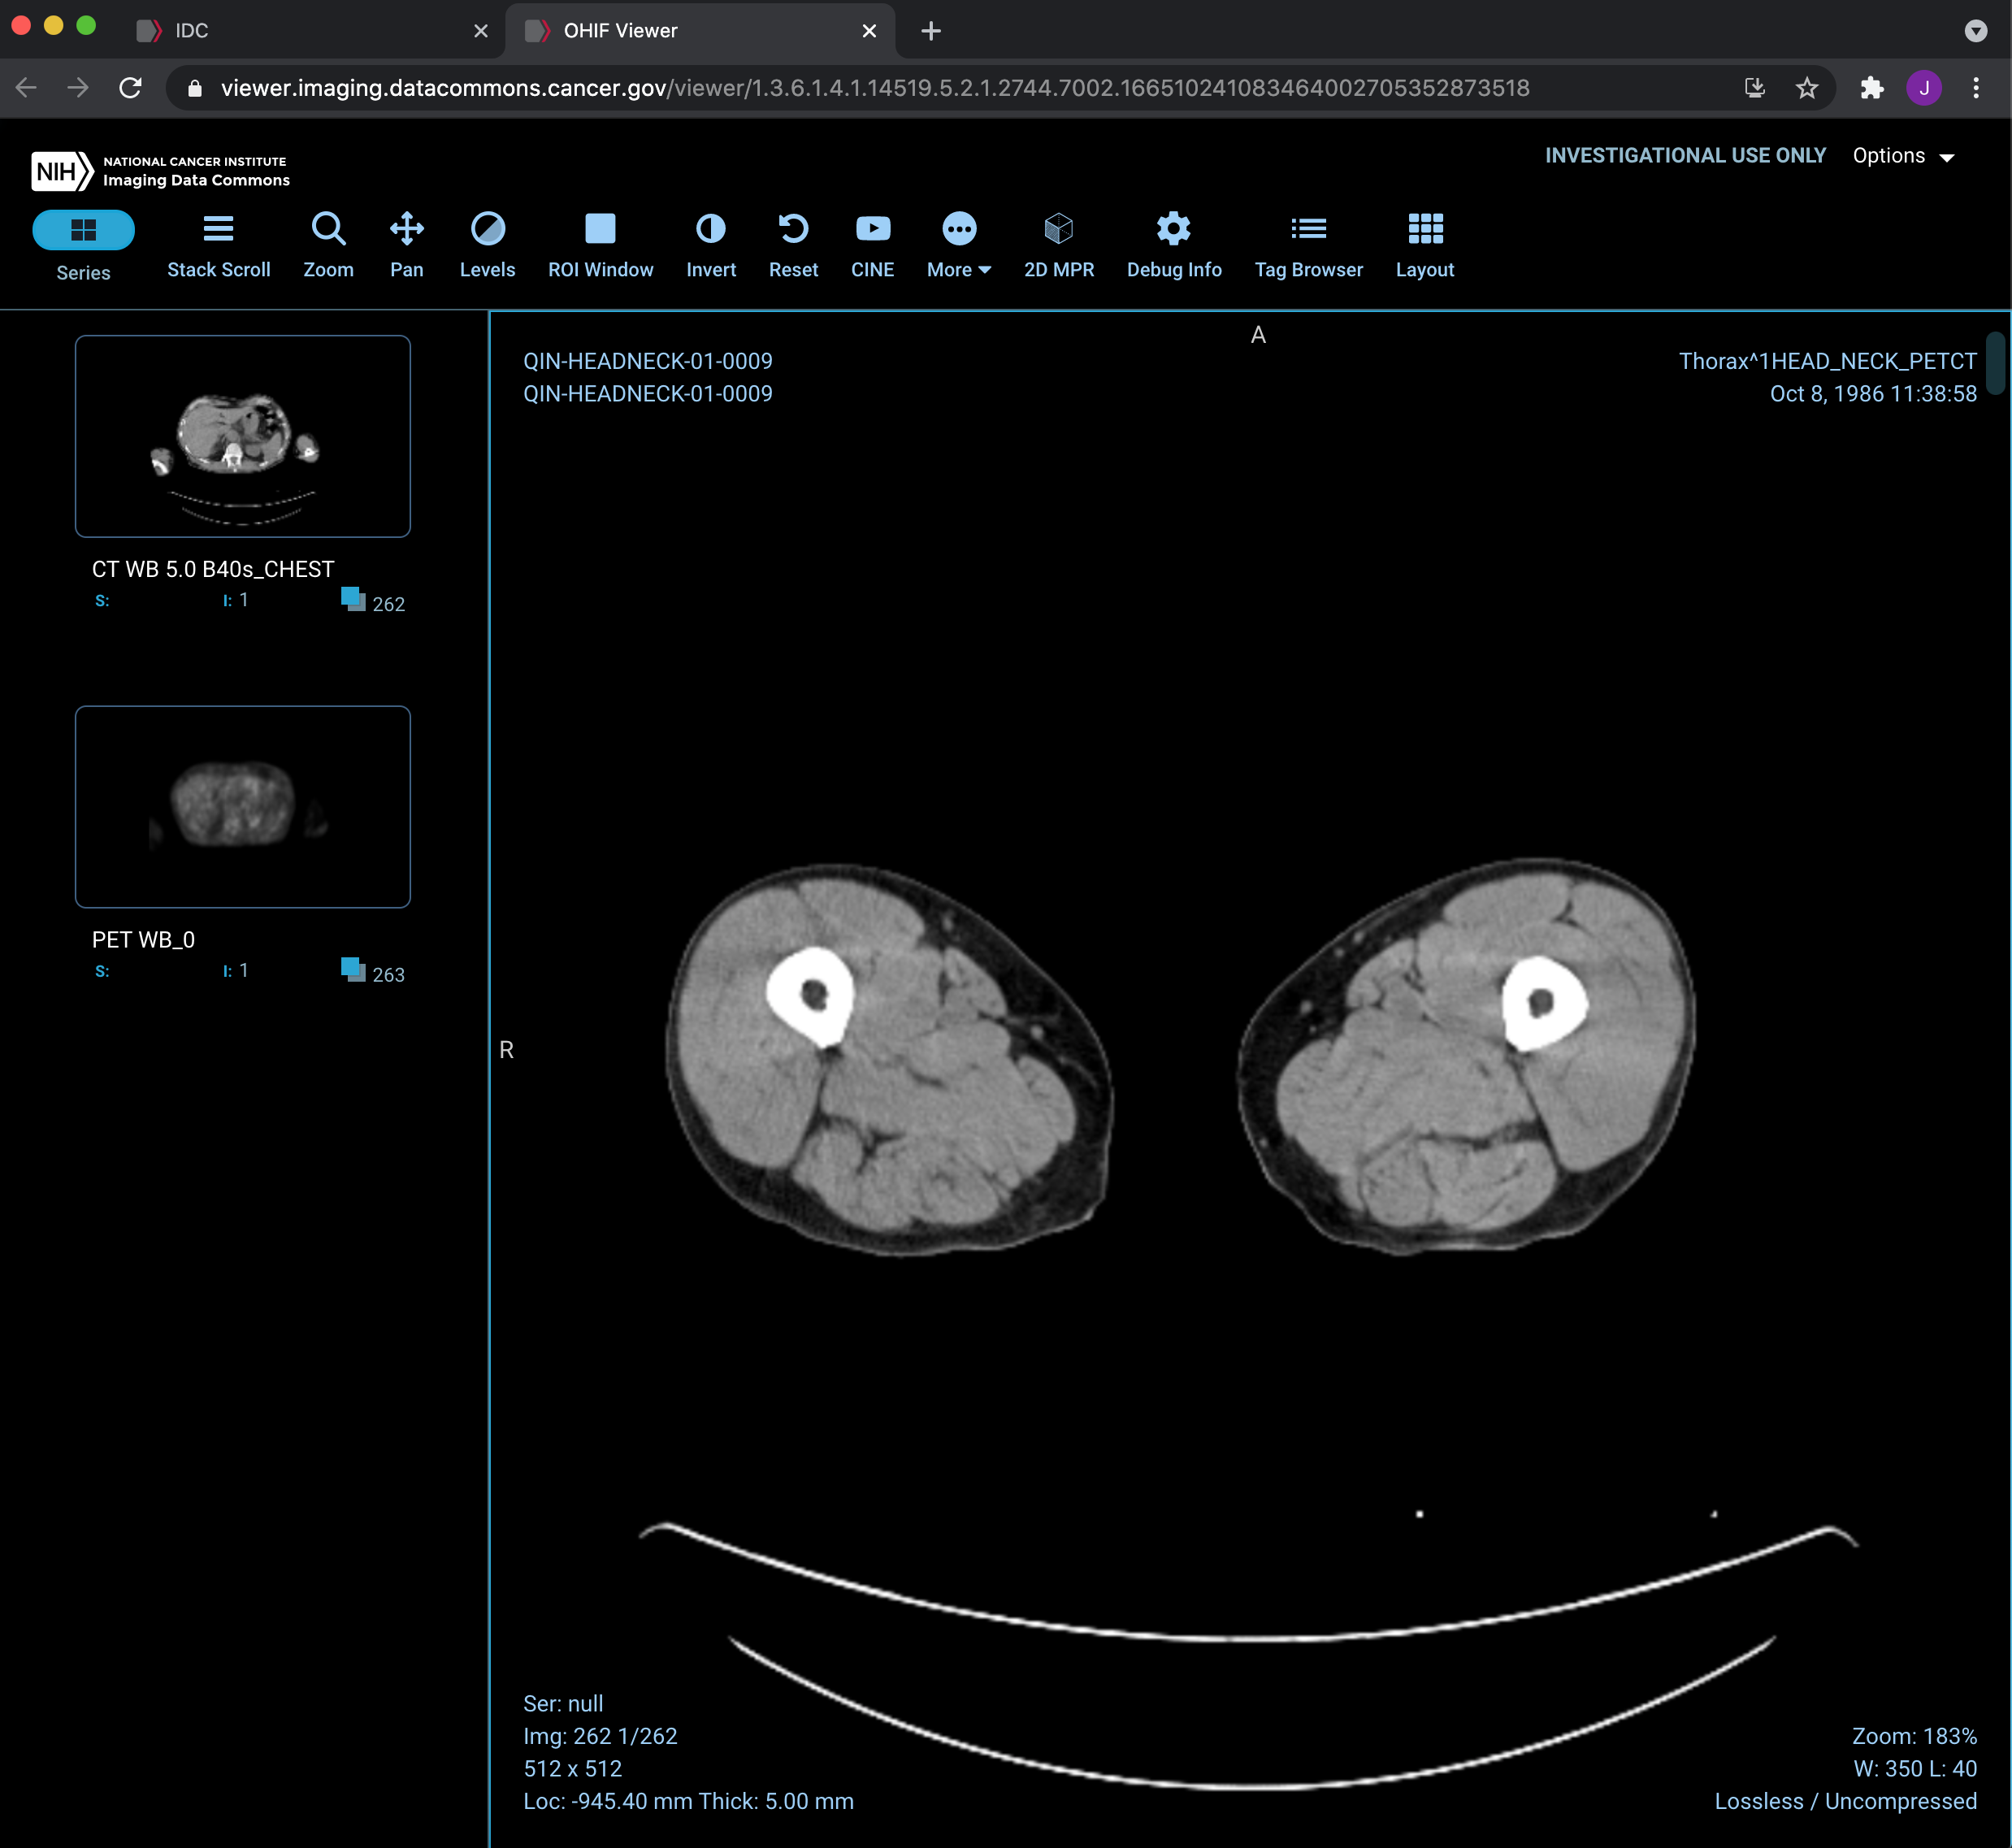

**Task 2**: Visualize structural and PET side-by-side! [30 Points]

In [ ]:
# In the OHIF viewer, please change the layout to show the structural image
# next to the PET scan.
#
# TODO: Use the LAYOUT functionality in the toolbar to switch to a 2-column layout.

In [ ]:
# TODO: Find the cancerous lesion.
#
# 1) Navigate through the PET image to find the cancerous lesion.

In [ ]:
# TODO: Sync the structural scan (CT or MR) to the PET scan with the lesion.
#
# Hint: The "Loc" label in the bottom left of both scans should roughly match.
# Hint 2: The Levels tool allows Window/Level adjustment to increase contrast.
#

In [ ]:
# TODO: Paste a screenshot showing the 2-column layout below.

TODO: Add screenshot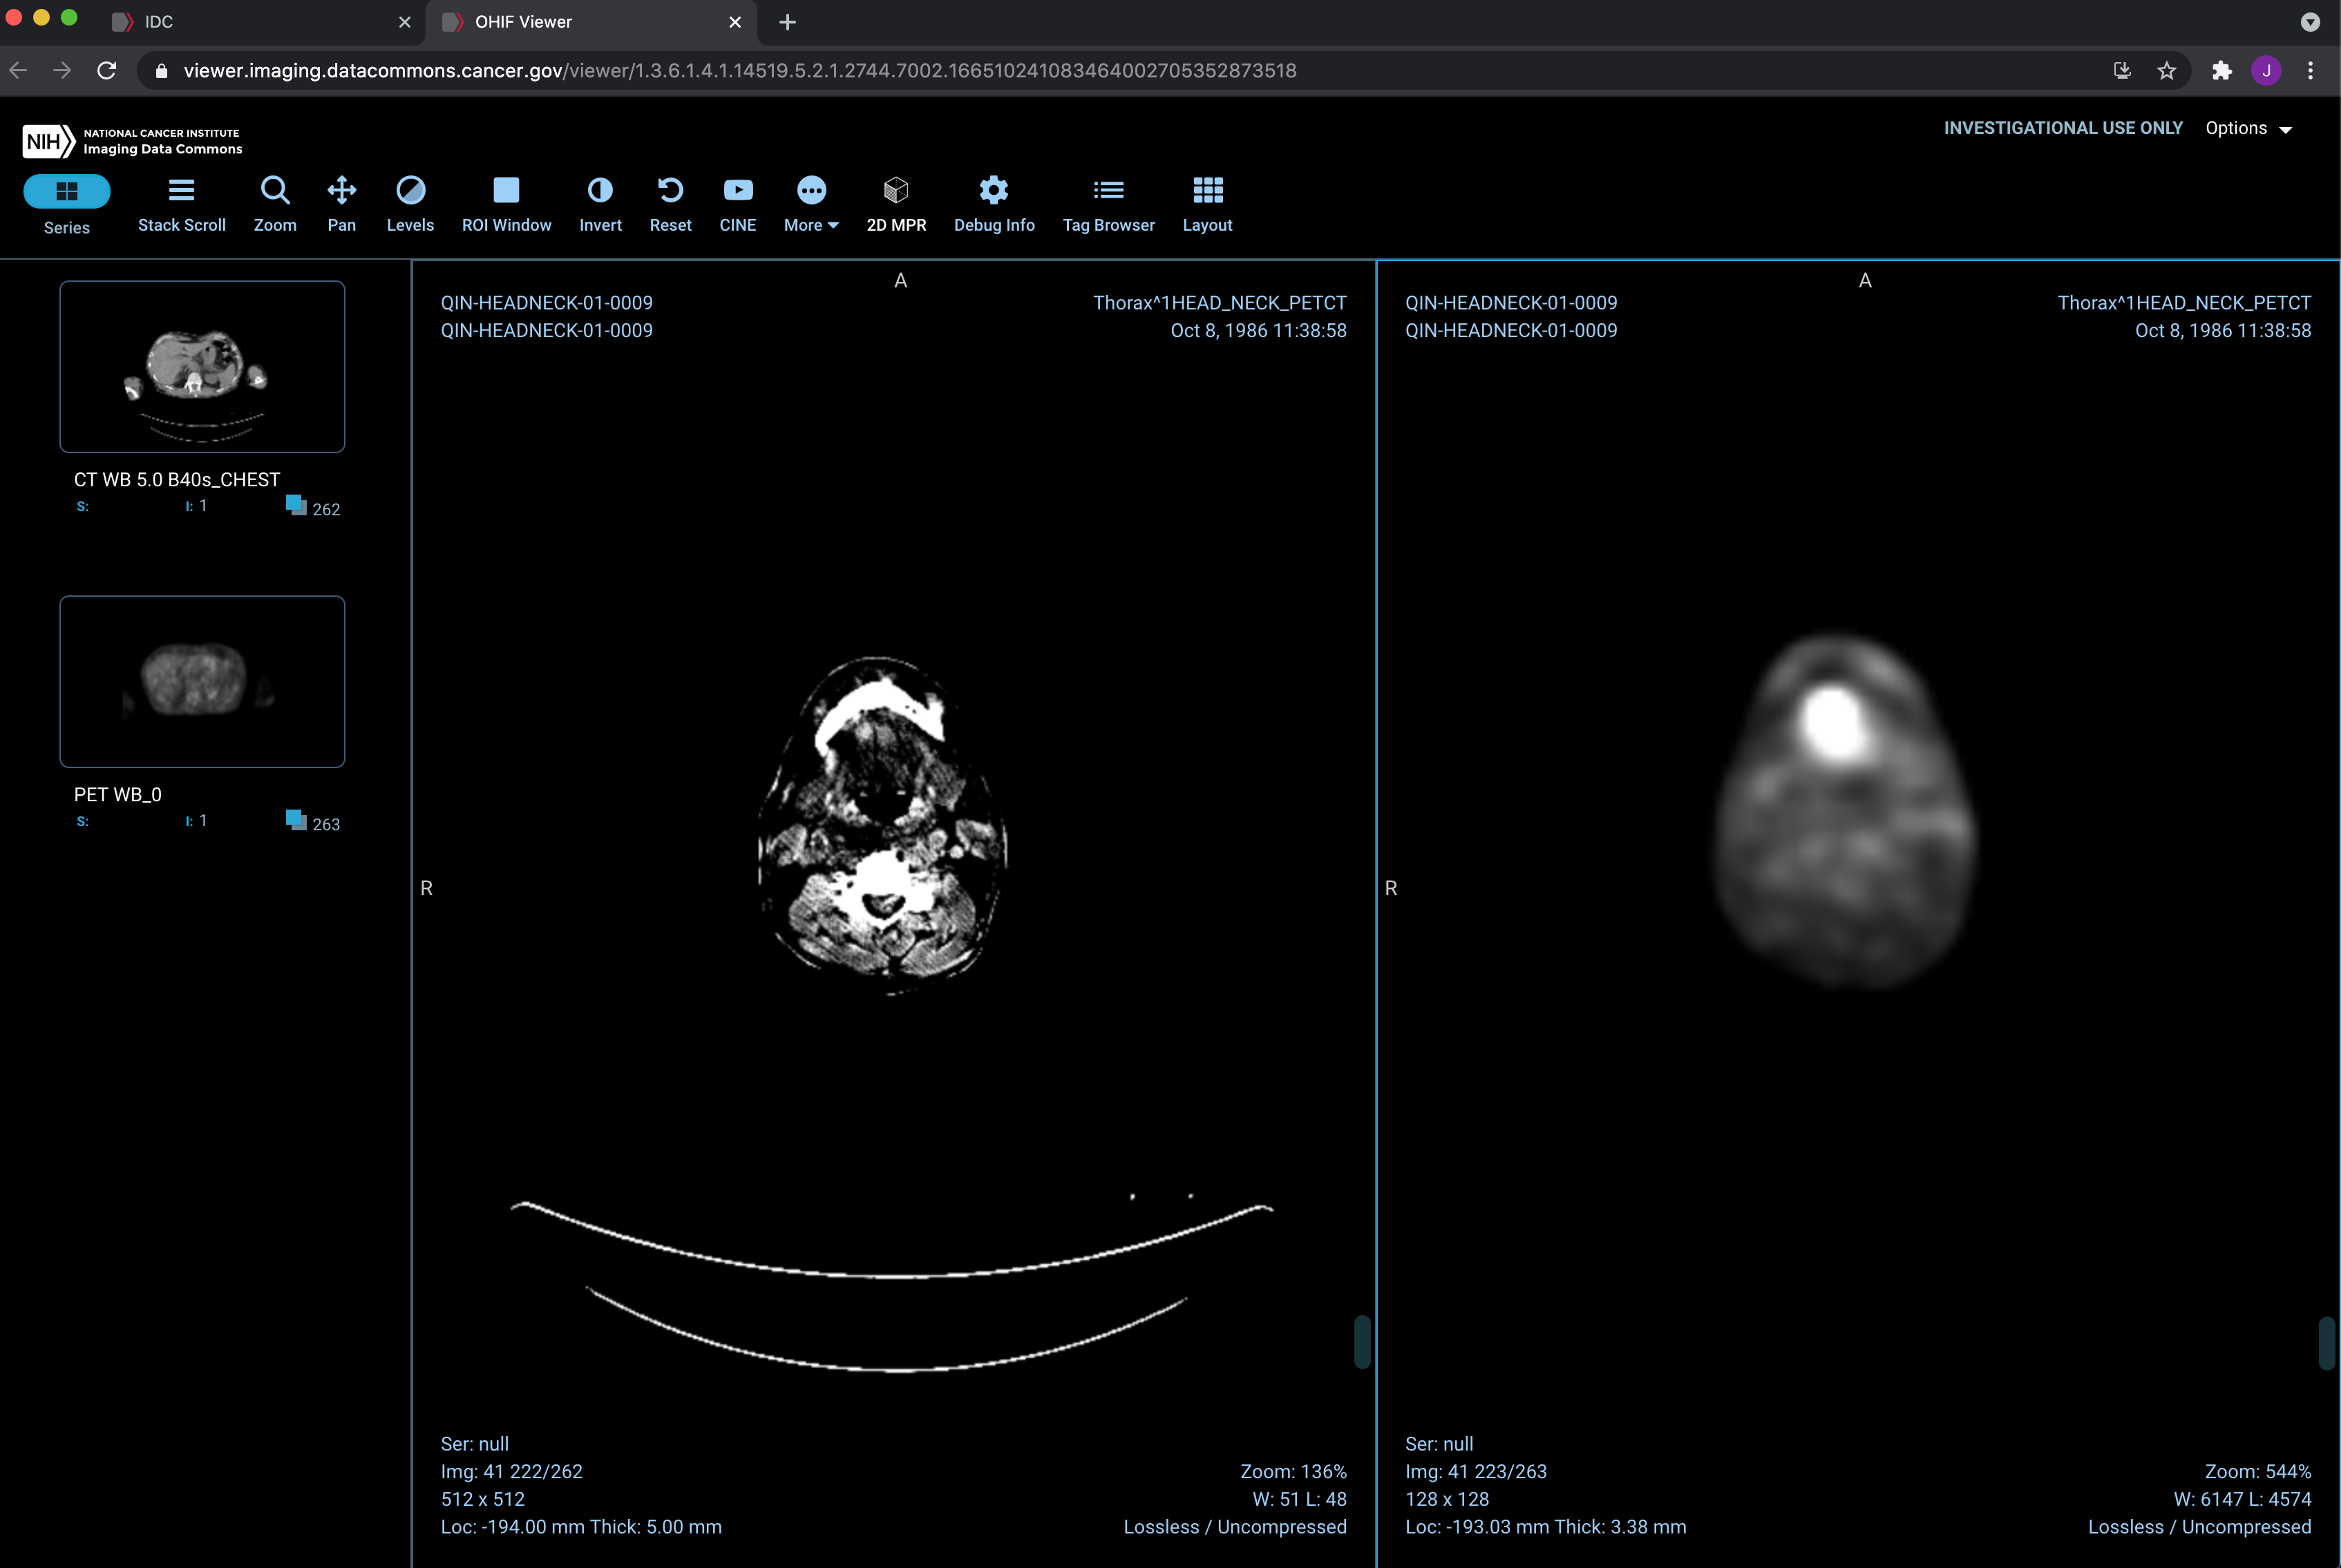

**Task 3**: Use an MIP to reslice the PET scan! [35 Points]

In [ ]:
# We will now use the 2D MPR functionality to look at the lesion from different
# orientations.
#
# Hint: This works best in Google Chrome.

In [ ]:
# Question 1): What is MPR?
#

In [ ]:
# TODO: YOUR ANSWER
Multiplanar Reconstruction / Reformation

In [ ]:
# Question 2): What is the difference between MIP, MinIP, AvgIP?
#

In [ ]:
# TODO: YOUR ANSWER

# [Maximum / Minimum / Average] Intensity Projection
# These algorithms are used to project voxels of the desired Hounsfield intensity
# onto a 2D image. This allows a more comprehensive 2D view of 3D structures. They
# 'flatten' the image in a relevant way.

# - Maximum Intensity Projection (MIP) shows bone and areas of higher concentrations
#   of contrast material best. This can help show lung nodules in the image. 

# - Minimum Intensity Projection (MinIP) shows tissue damage better. This can help
#   display ground glass and other types of lung infections.

# Info found on https://radiopaedia.org/

# - Average Intensity Projection (AvgIP) I couldn't find as much info on, but the
#   name would imply that the intensity value is set to an average of all voxels
#   Hounsfield intensities along the axis being projected. I read that combined with
#   slab thickness, AvgIP can help reduce noise in the image.

In [ ]:
# Now, please navigate to the lesion in all 3 orientations.
#
# TODO: Paste a screenshot below.
#

TODO: Add screenshot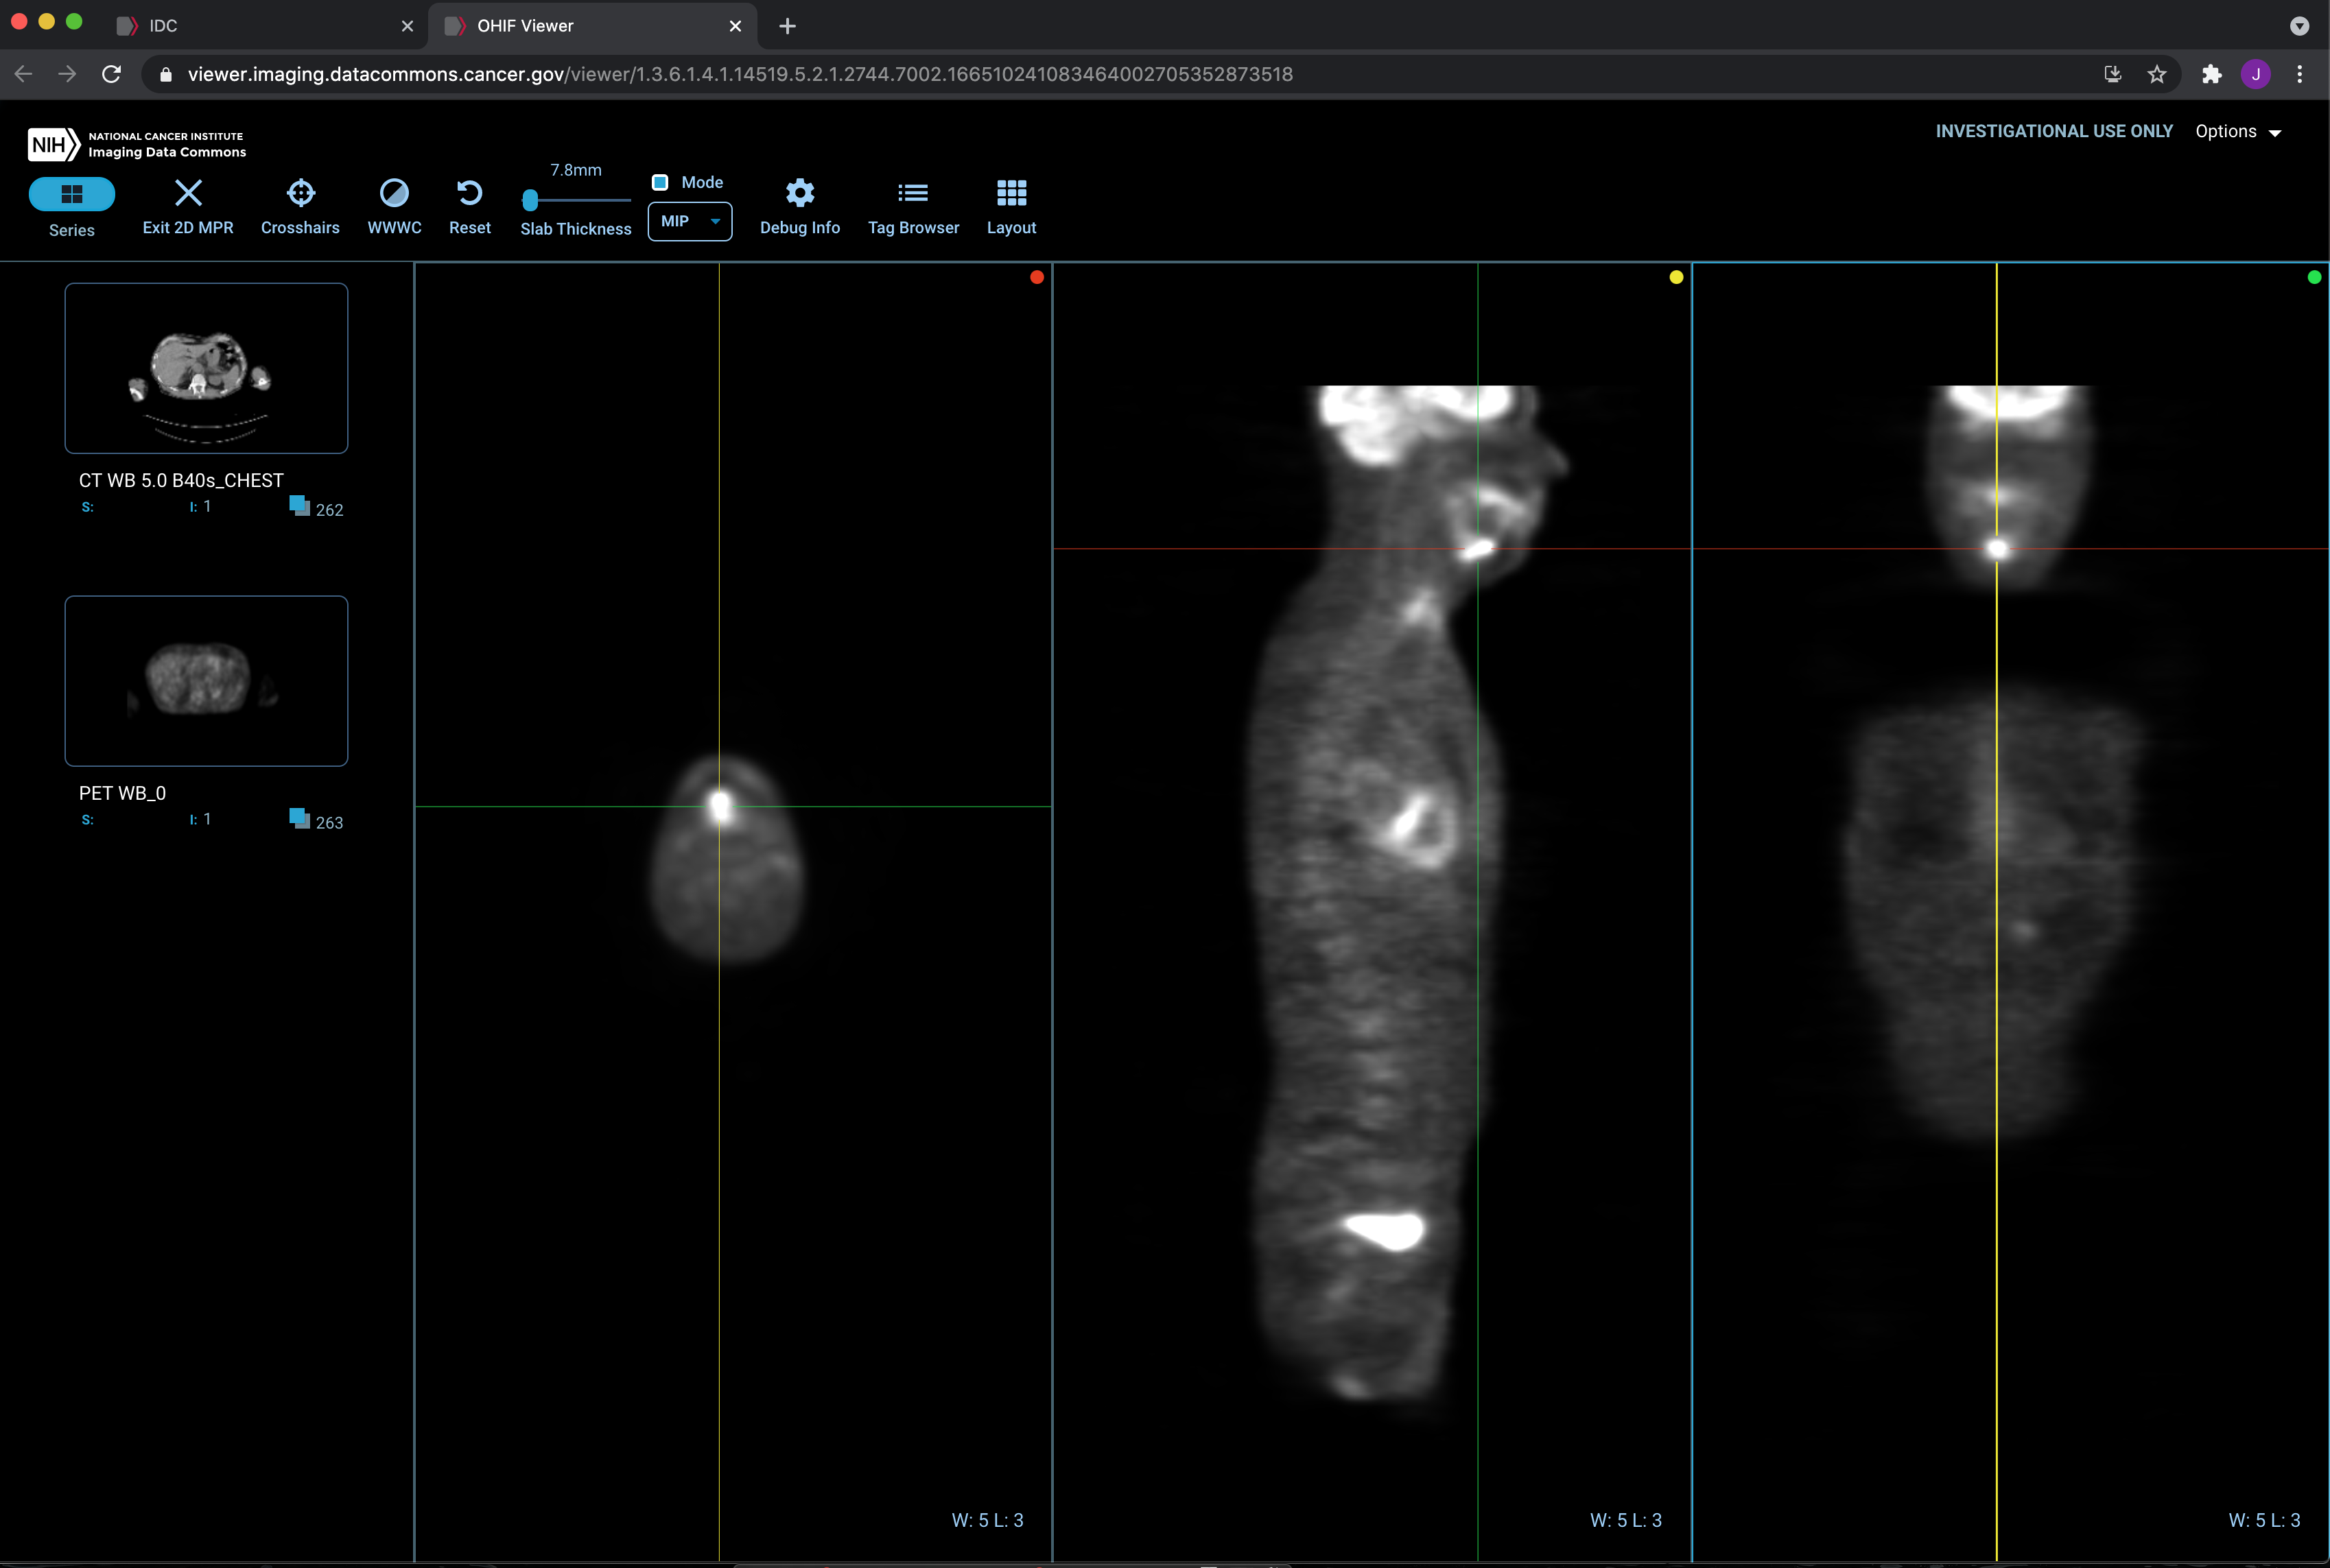

In [ ]:
# Question 3): What does the Slab Thickness slider do?
#

In [ ]:
# TODO: YOUR ANSWER
# It determines how far from the target location to consider intensity values?
# This allows the user to specify the volume within which to find the intensity
# value to project. Making this too large may cause MIP to display bone level
# intensity values or MinIP to show too much air level intensities. Making it too
# small may result in an unenhanced 2D slice.

**Task 4**: Let's access the pixel data! [20 Points]

In [ ]:
# Please EXIT THE 2D MPR.
#
# We will now grab the pixel data of the currently displayed slice
# using the Javascript console.
#

In [ ]:
# 1) Open the Developer Tools of your browser and access the JS console.
#

In [ ]:
# 2) The following code allows to access the pixel data of the slice that
# is currently displayed.
#
# element = cornerstone.getEnabledElements()[0];
# pixels = element.image.getPixelData();
#

In [ ]:
# Question 4): What is the maximum pixel value of the current slice?
#
# Hint: There are multiple ways of doing this according to
# https://medium.com/coding-at-dawn/the-fastest-way-to-find-minimum-and-maximum-values-in-an-array-in-javascript-2511115f8621
#

In [ ]:
# TODO: YOUR ANSWER

# Here's what I did:

# max = -1000000
# for (let i = 0; i < pixels.length; i++) { max = (pixels[i] > max) ? pixels[i] : max; }
# console.log(max) # result: 2799

# Max pixel value: 2799


**Bonus**: Apply a filter mask to the current slice! [33 Points]


In [ ]:
# Here we will modify the pixel data!
#
# The following code allows you to set the pixels of the current slice.
#
#   pixels.set(new_pixels);
#
# Write code to APPLY A FILTER MASK to the pixels.
#
# Hint: You can use the following code to get the dimensions of the current slice.
#   w = element.image.width;
#   h = element.image.height;
#
# You can decide which filter mask to apply (e.g., Gaussian blur, edge detection..).
#
# ** IMPORTANT **
# Hint 2: Triggering a REDRAW programmatically might be hard but you can use
# the LEVELS tool to manually trigger a redraw to see filtered pixels.
# ** IMPORTANT **

In [ ]:
#
#
# TODO: YOUR CODE GOES HERE
#
#
# element = cornerstone.getEnabledElements()[0];
# pixels = element.image.getPixelData();
# w = element.image.width;
# h = element.image.height;
# new_pixels = [];
# for (let i = 0; i < pixels.length; i++) {
#     // Pad the array (add the border)
#     if (i < w || i % w == 0 || i % w == w-1 || i >= w*h-w) {
#         new_pixels.push(0);
#         continue;
#     }
#     // Edge detection (manual sobel filter)
#     let pValX = -1*pixels[i-w-1] + 1*pixels[i-w+1] 
#               + -2*pixels[i-1]   + 2*pixels[i+1]
#               + -1*pixels[i+w-1] + 1*pixels[i+w+1];
# 
#     let pValY = 1*pixels[i-w-1] + -1*pixels[i+w-1] 
#               + 2*pixels[i-w]   + -2*pixels[i+w]
#               + 1*pixels[i-w+1] + -1*pixels[i+w+1];
# 
#     let pVal = Math.sqrt(pValX*pValX + pValY*pValY);
# 
#     new_pixels.push(pVal);
# }
# pixels.set(new_pixels);

In [ ]:
# TODO: Please add a screenshot after filtering the current slice.

TODO: ADD SCREENSHOT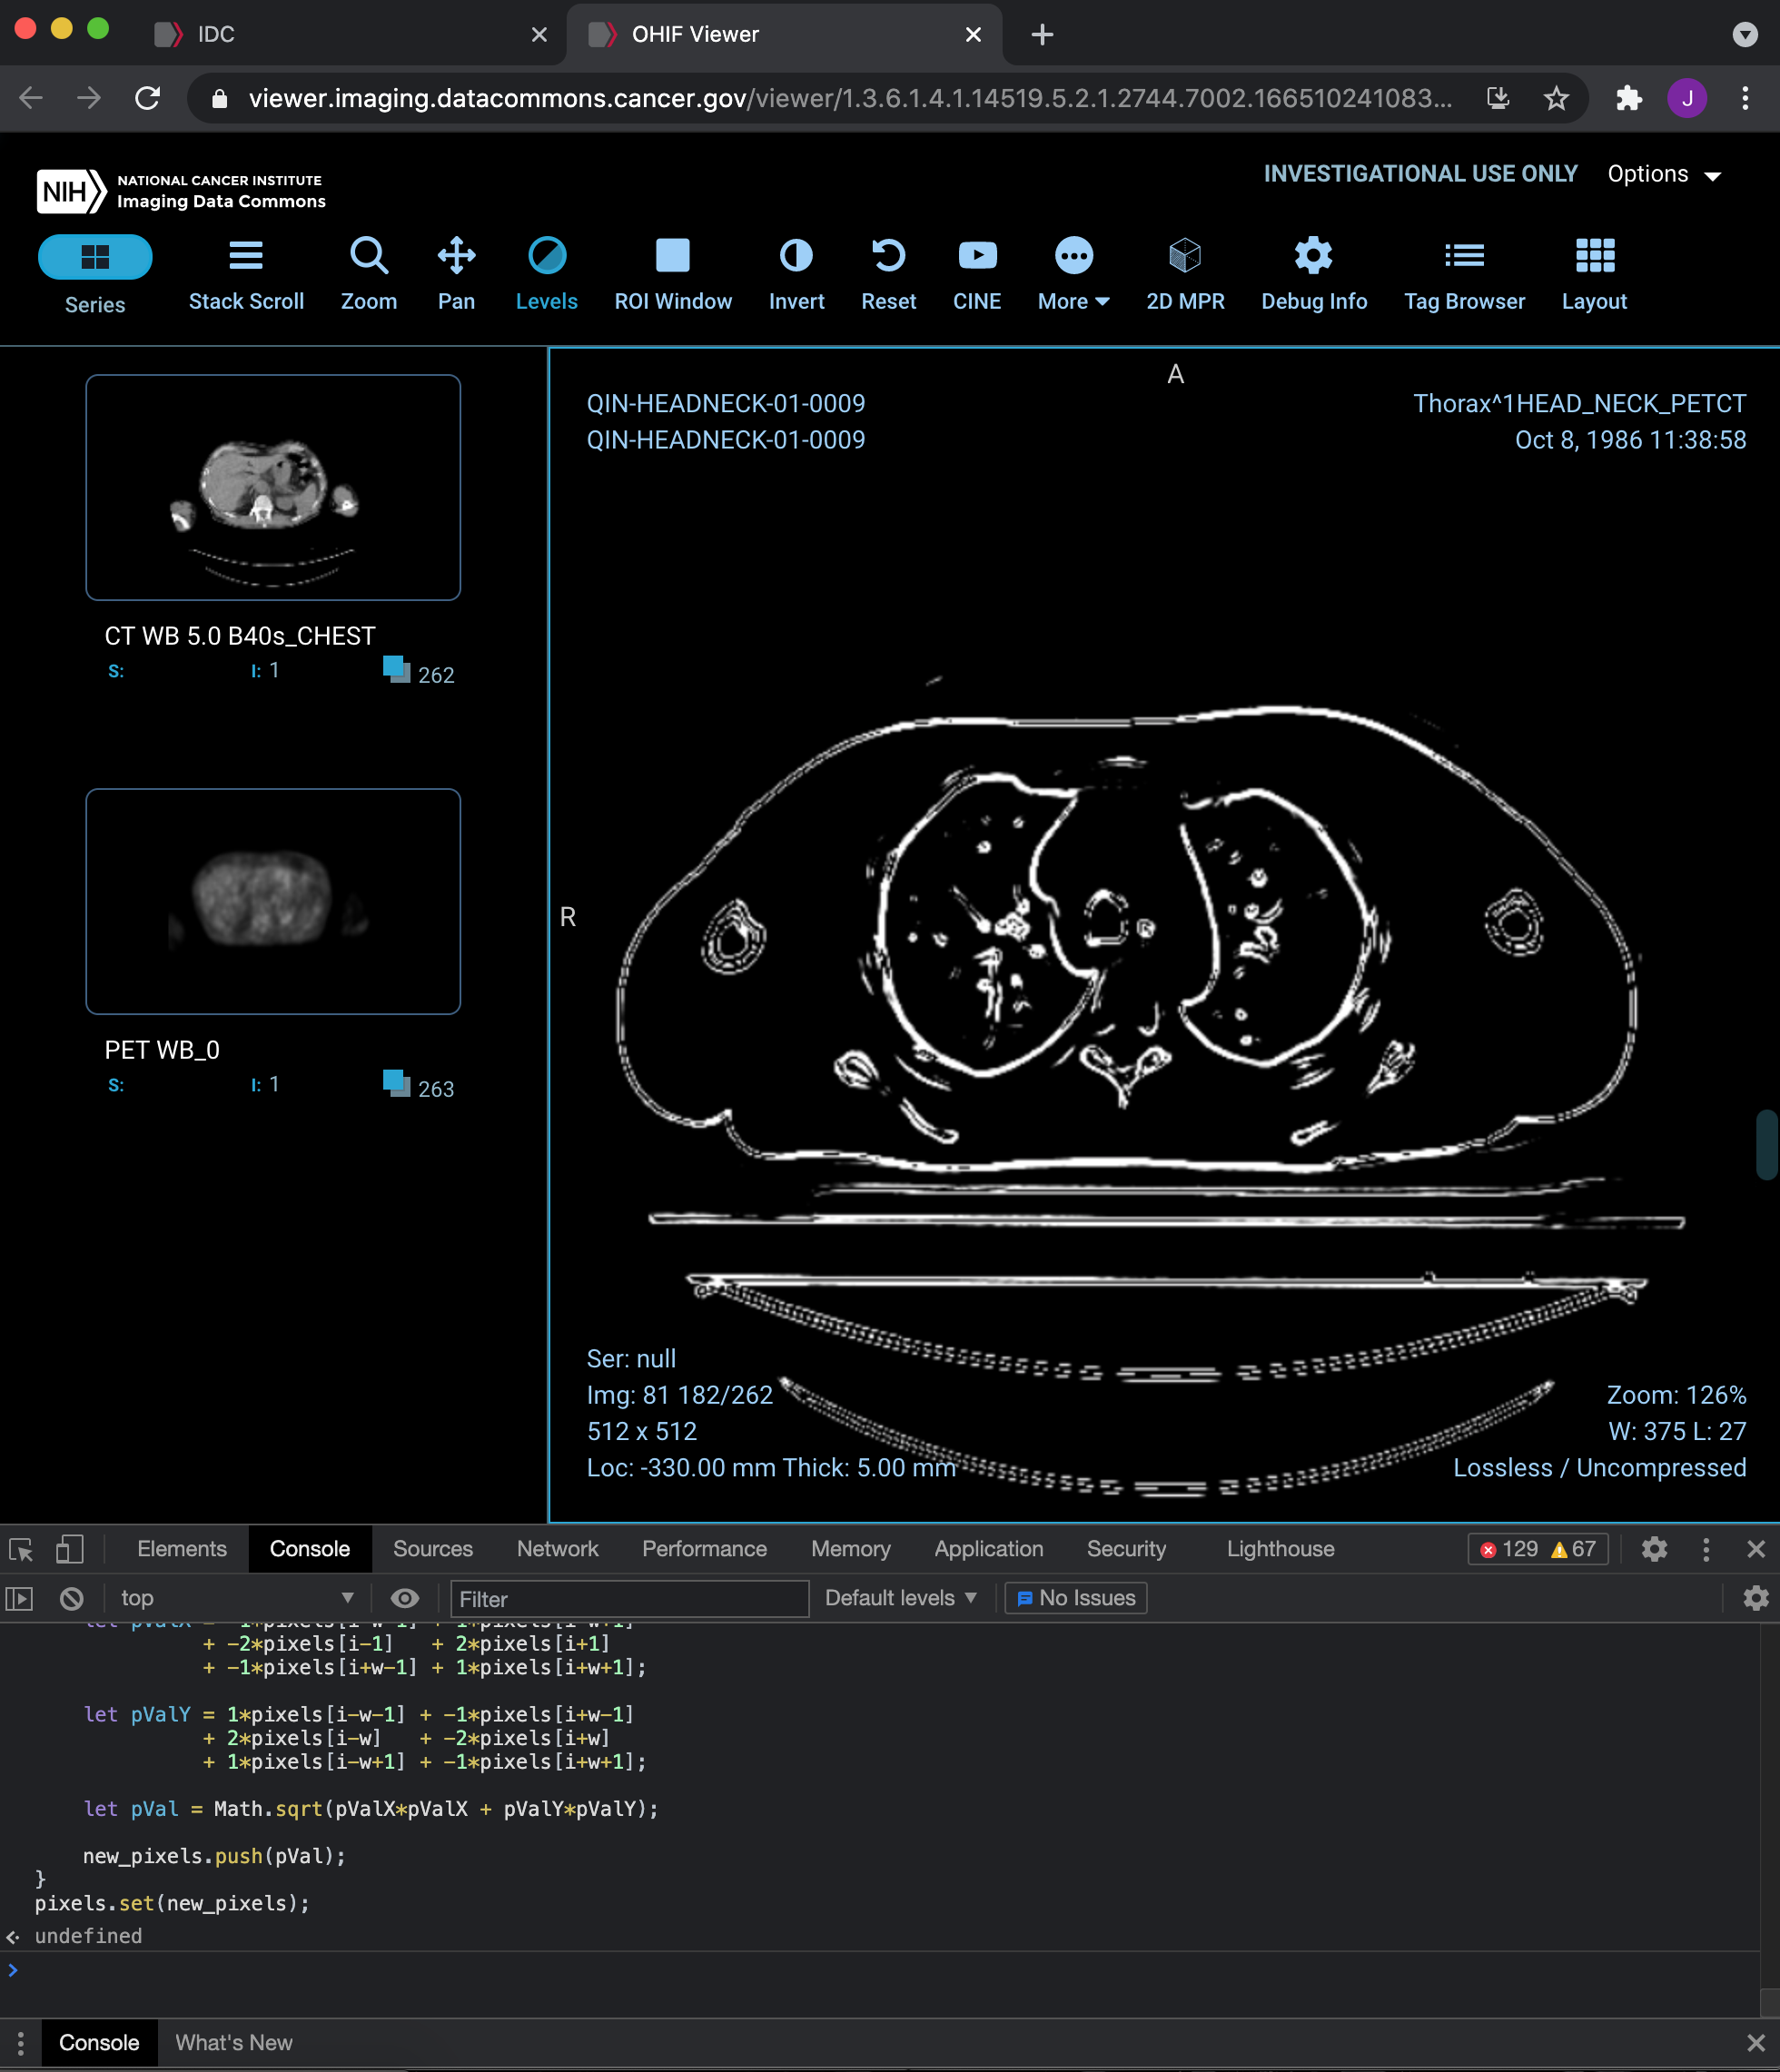

In [ ]:
#
# SUPER BONUS (+33 extra): Can you trigger the redraw programmatically?
#

In [ ]:
# TODO: YOUR CODE FOR REDRAW GOES HERE

# Couldn't figure it out... I tried.

In [ ]:
#
# THANK YOU!!!
#
#       .--..--..--..--..--..--.
#     .' \  (`._   (_)     _   \
#   .'    |  '._)         (_)  |
#   \ _.')\      .----..---.   /
#   |(_.'  |    /    .-\-.  \  |
#   \     0|    |   ( O| O) | o|
#    |  _  |  .--.____.'._.-.  |
#    \ (_) | o         -` .-`  |
#     |    \   |`-._ _ _ _ _\ /
#     \    |   |  `. |_||_|   |
#     | o  |    \_      \     |     -.   .-.
#     |.-.  \     `--..-'   O |     `.`-' .'
#   _.'  .' |     `-.-'      /-.__   ' .-'
# .' `-.` '.|='=.='=.='=.='=|._/_ `-'.'
# `-._  `.  |________/\_____|    `-.'
#    .'   ).| '=' '='\/ '=' |
#    `._.`  '---------------'
#            //___\   //___\
#              ||       ||
#     LGB      ||_.-.   ||_.-.
#             (_.--__) (_.--__)
#
#